In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles

from utils import plot_data, plot_decision_boundary

seed = 42
np.random.seed(seed)

## Blobs Data

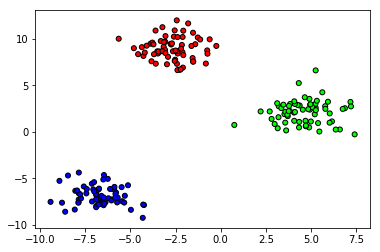

In [3]:
X, y = make_blobs(n_samples=200, centers=3, n_features=2, cluster_std=1.2)
plot_data(X, y)

In [4]:
class KNN:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X):
        distances = self.compute_distances(X)
        return self._predict_labels(distances).astype(np.int64)
    
    def compute_distances(self, X):
        distances = np.sum(X ** 2, axis=1, 
                       keepdims=True) + np.sum(self.X ** 2, 
                                               axis=1) - 2 * np.dot(X, self.X.T)
        return distances
    
    def _predict_labels(self, dists):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        
        for i in range(num_test):
            indices = np.argsort(dists[i, :])[:self.k]
            closest_y = self.y[indices]
            counts = np.bincount(closest_y)
            y_pred[i] = np.argmax(counts)
        
        return y_pred

In [5]:
knn_scratch = KNN(k=5)
knn_scratch.fit(X, y)

preds = knn_scratch.predict(X)
print("Accuracy: ", (preds == y).mean())

Accuracy:  1.0


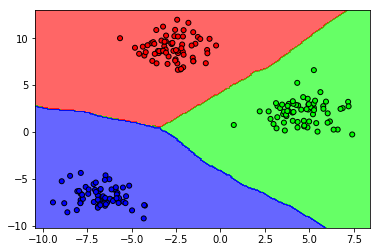

In [6]:
plot_decision_boundary(knn_scratch, X, y)
plot_data(X, y)

In [7]:
# Sklearn way
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X, y)
preds = knn.predict(X)

print("Accuracy: ", (preds == y).mean())

Accuracy:  1.0


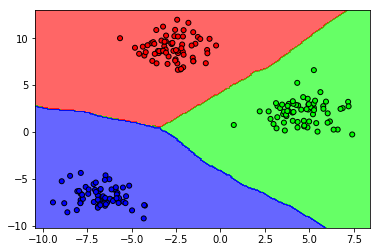

In [8]:
plot_decision_boundary(knn, X, y)
plot_data(X, y)

## Circles Data

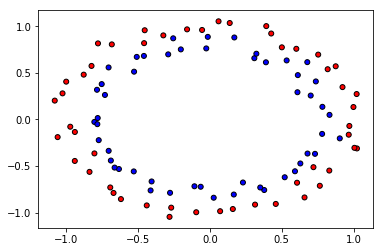

In [9]:
X, y = make_circles(n_samples=100, noise=0.05)
plot_data(X, y)

In [10]:
knn_scratch = KNN(k=5)
knn_scratch.fit(X, y)

preds = knn_scratch.predict(X)
print("Accuracy: ", (preds == y).mean())

Accuracy:  0.96


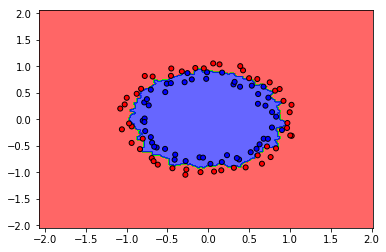

In [11]:
plot_decision_boundary(knn_scratch, X, y)
plot_data(X, y)

In [12]:
# Sklearn way
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X, y)
preds = knn.predict(X)

print("Accuracy: ", (preds == y).mean())

Accuracy:  0.96


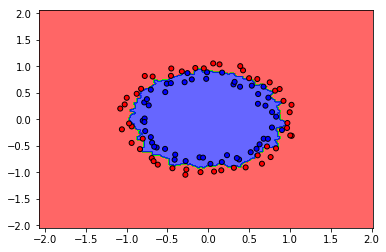

In [13]:
plot_decision_boundary(knn, X, y)
plot_data(X, y)